In [1]:
import sys
import os
import uproot
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

from functools import partial

from matplotlib.colors import LogNorm

In [2]:
### Import functions from peak_functions

repository_path = os.path.abspath('../..')
sys.path.append(repository_path)

import blr_functions  as blr
import peak_functions as pf
import fit_functions  as fitf

In [3]:
import re

trigger_chs = [9, 10, 11]

def extract_date_and_number(filename):
    match = re.search(r"(\d{2}_\d{2}_\d{4})-file_(\d+)", filename)
    return match.group(1), int(match.group(2))

def adapt_evt_id(evt_id, fnum):
    return 1000000*fnum + np.array(evt_id)

In [4]:
normal_chs1 = range(9)
normal_chs2 = [0, 1, 2, 3, 4, 6, 7, 8]

filename   = '/Users/romoluque_c/Repositories/BACON_romo/BACoN_hits_and_times_thr50_md50_run-11_20_2023-file_1.npz'
d          = np.load(filename, allow_pickle=True)
date, fnum = extract_date_and_number(os.path.basename(filename))

if date.startswith("11"):
    normal_chs = normal_chs1
else:
    normal_chs = normal_chs2
    
filt_evts_all                    = {ch: d['filt_evts_dict'].item()[ch] for ch in normal_chs}
idx_peaks_ch_all                 = {ch: np.concatenate(d['idx_peaks_ch_dict']                .item()[ch]) for ch in normal_chs}
idx_peaks_thr_ch_all             = {ch: np.concatenate(d['idx_peaks_thr_ch_dict']            .item()[ch]) for ch in normal_chs}
height_peaks_ch_all              = {ch: np.concatenate(d['height_peaks_ch_dict']             .item()[ch]) for ch in normal_chs}
height_peaks_sg_ch_all           = {ch: np.concatenate(d['height_peaks_sg_ch_dict']          .item()[ch]) for ch in normal_chs}
height_peaks_deconv_ch_all       = {ch: np.concatenate(d['height_peaks_deconv_ch_dict']      .item()[ch]) for ch in normal_chs}

idx_peaks_ch_trigg_all           = {ch: np.concatenate(d['idx_peaks_ch_trigg_dict']          .item()[ch]) for ch in trigger_chs}
idx_peaks_thr_ch_trigg_all       = {ch: np.concatenate(d['idx_peaks_thr_ch_trigg_dict']      .item()[ch]) for ch in trigger_chs}
height_peaks_ch_trigg_all        = {ch: np.concatenate(d['height_peaks_ch_trigg_dict']       .item()[ch]) for ch in trigger_chs}
height_peaks_sg_ch_trigg_all     = {ch: np.concatenate(d['height_peaks_sg_ch_trigg_dict']    .item()[ch]) for ch in trigger_chs}
height_peaks_deconv_ch_trigg_all = {ch: np.concatenate(d['height_peaks_deconv_ch_trigg_dict'].item()[ch]) for ch in trigger_chs}

## Plot times and hits

### Normal channels

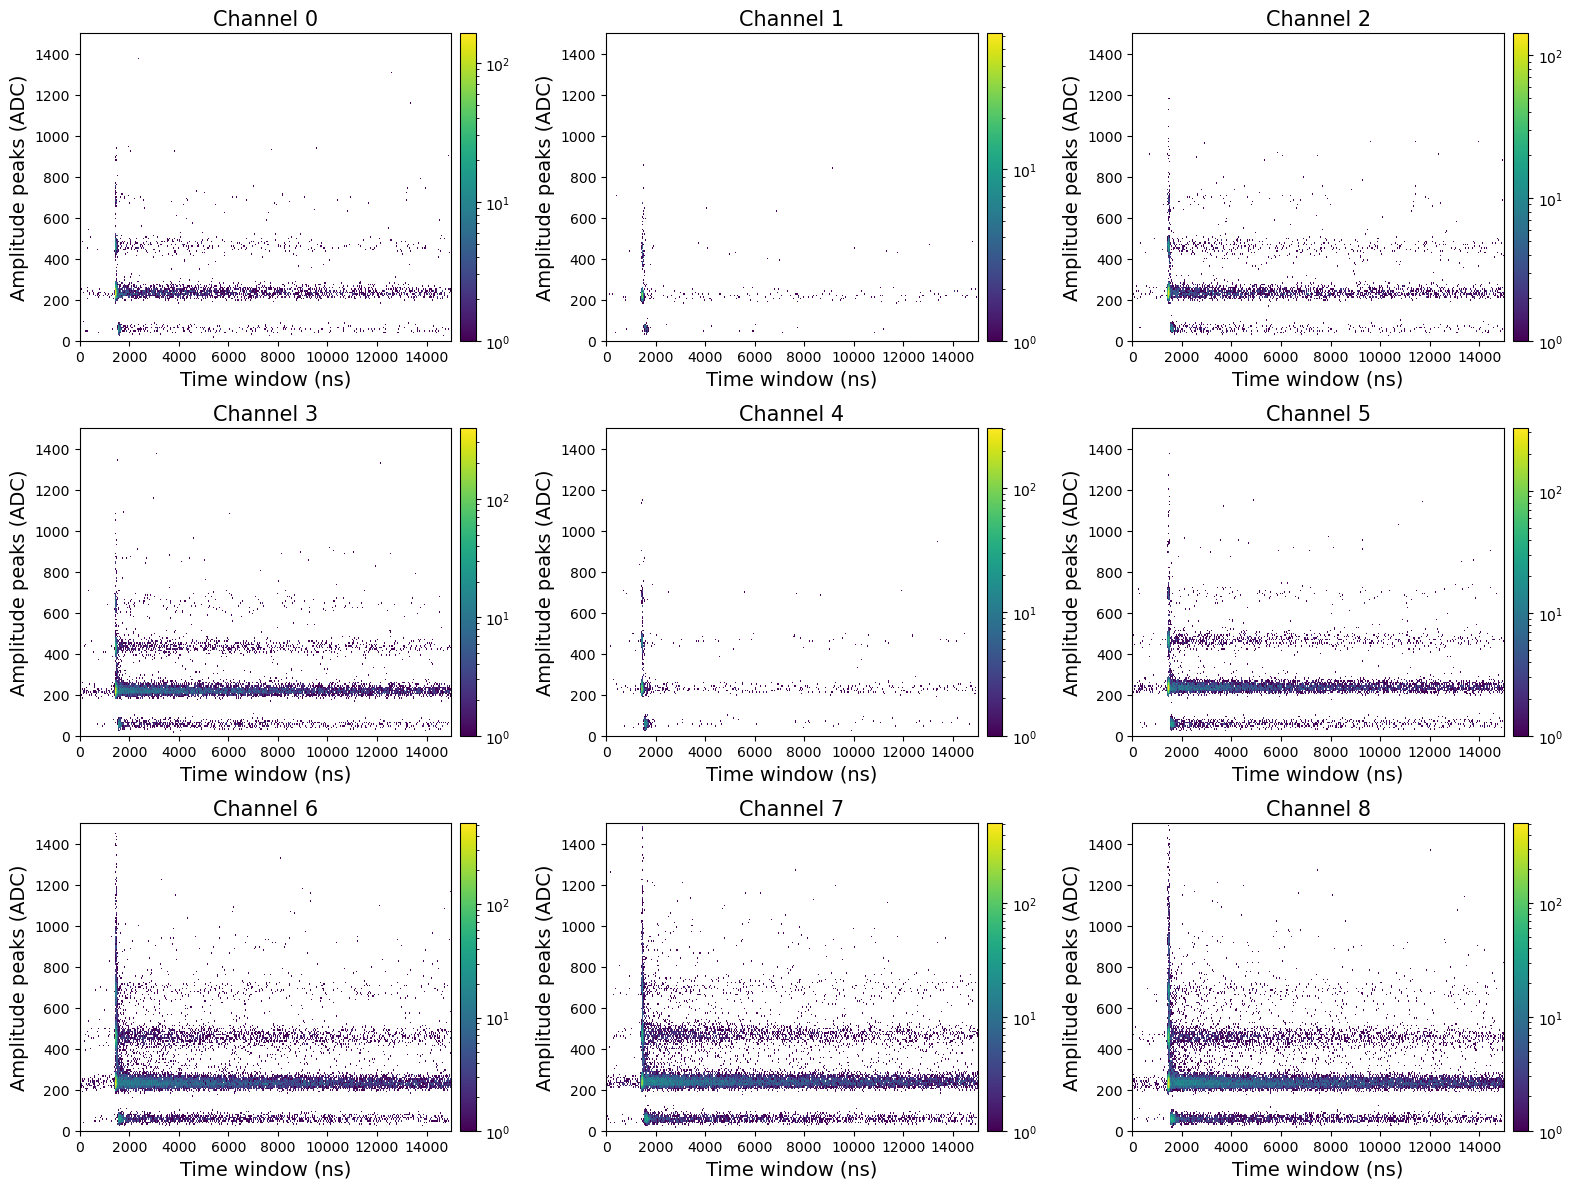

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(16, 12))
for k in normal_chs:
    i = int(k/3)
    j = k%3
    
    ch_idxs = idx_peaks_ch_all   [k]
    ch_vals = height_peaks_ch_all[k]
    
    fig0 = axs[i][j].hist2d(ch_idxs*2, ch_vals, bins=(500, 200), range=((0, 15000), (0, 1500)), cmin=1, norm=LogNorm())
    axs[i][j].set_xlabel('Time window (ns)',      fontsize=14)
    axs[i][j].set_ylabel('Amplitude peaks (ADC)', fontsize=14)
    axs[i][j].set_title(f"Channel {k}",           fontsize=15)
    fig.colorbar(fig0[3], ax=axs[i][j], pad=0.02)
plt.tight_layout()
plt.show()

### Trigger channels

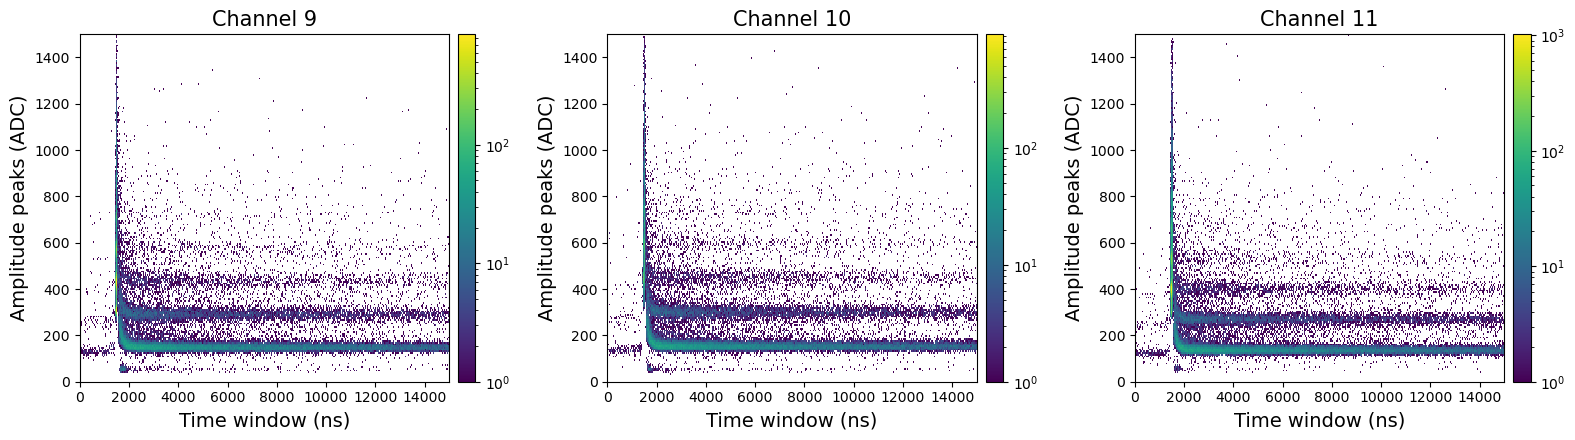

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4.5))
for k in trigger_chs:
    j = k%3
    
    ch_idxs = idx_peaks_ch_trigg_all   [k]
    ch_vals = height_peaks_ch_trigg_all[k]
    
    fig0 = axs[j].hist2d(ch_idxs*2, ch_vals, bins=(500, 200), range=((0, 15000), (0, 1500)), cmin=1, norm=LogNorm())
    axs[j].set_xlabel('Time window (ns)',      fontsize=14)
    axs[j].set_ylabel('Amplitude peaks (ADC)', fontsize=14)
    axs[j].set_title(f"Channel {k}",           fontsize=15)
    fig.colorbar(fig0[3], ax=axs[j], pad=0.02)

plt.tight_layout()
plt.show()

### You can play with the waveforms that you have analyzed using the event number and the original data file

### We can look at some wfs with signal for channel 0

In [7]:
sel_ch = 0
filt_evts_all[sel_ch]

array([4, 12, 16, ..., 23639, 23640, 23647], dtype=object)

In [8]:
filename_root = '/Users/romoluque_c/LEGEND/BACON/datatest/run-11_20_2023-file_1.root'
infile        = uproot.open(filename_root)
RawTree       = infile['RawTree']

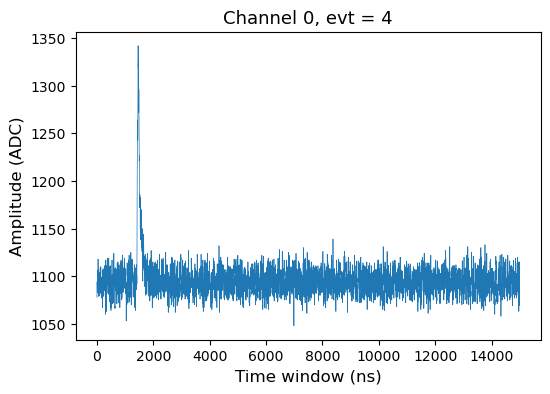

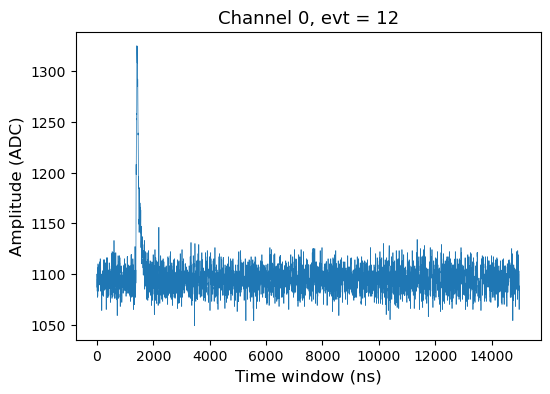

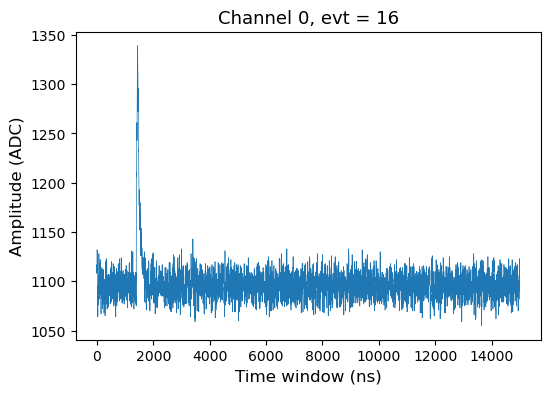

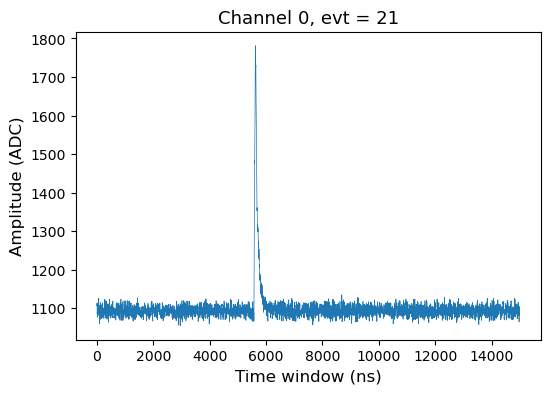

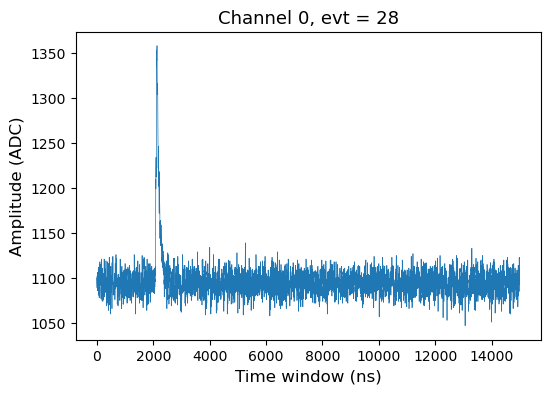

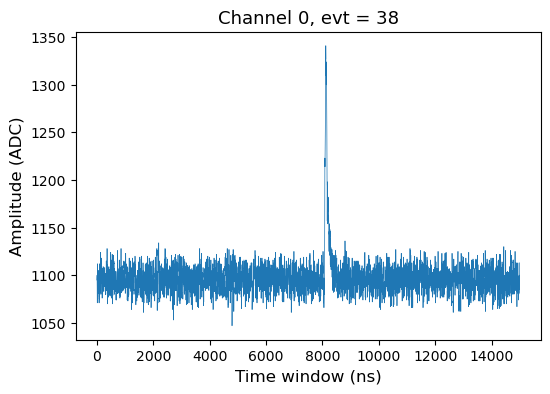

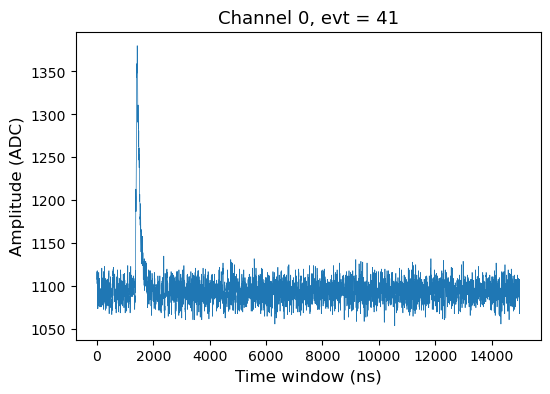

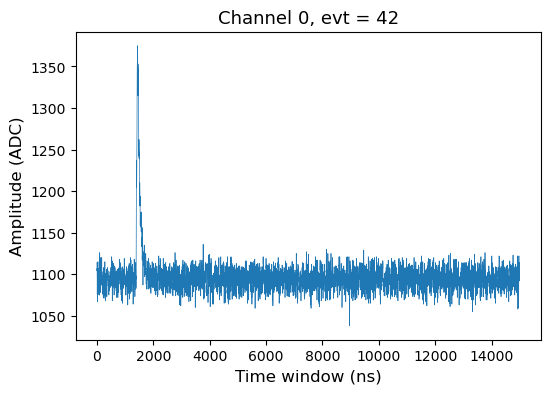

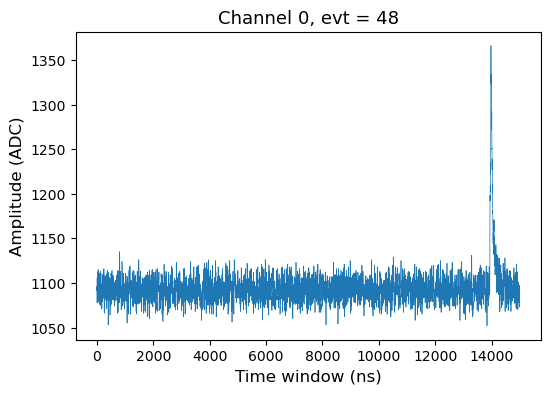

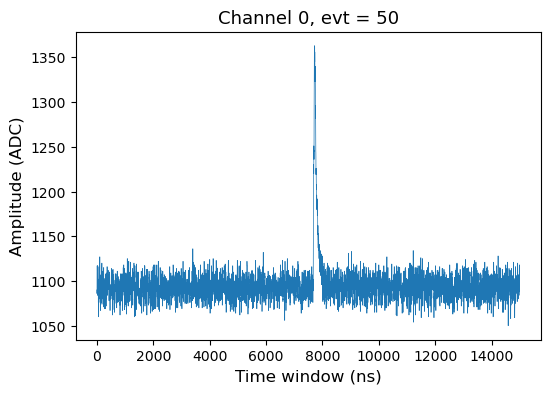

In [9]:
for sel_evt in filt_evts_all[sel_ch][:10]:
    sel_wf = pf.wfs_from_rawtree(RawTree, sel_ch)[sel_evt]
        
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.plot(2*np.arange(len(sel_wf)), sel_wf, linewidth=0.5)
    ax.set_xlabel('Time window (ns)', fontsize=12)
    ax.set_ylabel('Amplitude (ADC)',  fontsize=12)
    ax.set_title(f"Channel {sel_ch}, evt = {sel_evt}", fontsize=13)
    plt.show()